# Dataset processing

As we discussed last class, assemblying a dataset can be a hard task. Later processing it to be compatible with generative models can also be tricky ...

Today we are working with **Progressive GAN** and that model requires:

*   The **same resolution** for all images in the dataset (for example 1024)
*   **Square format** of the images (so 1024x1024) (ps: there might be some edited repos with non-square format ... but we can circumvent this by extending the image with black borders - a zero-padding of sorts).



## (helpers)

In [0]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def gallery(folder, num=-1, image_filetypes = [".png"]):
  images = []
  names = []
  files = glob.glob(folder)
  files.sort()

  if num is not -1:
      files = files[:min(num,len(files))]

  for img_path in files:
      allow = False
      for t in image_filetypes:
          if t == img_path[-4:]:
              allow = True
      if allow:
          names.append(img_path.split("/")[-1])
          images.append(mpimg.imread(img_path))

  for i, image in enumerate(images):
      print(names[i], "=", image.shape)

  fig = plt.figure(figsize=(10,10))
  columns = 5
  for i, image in enumerate(images):
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      
      plt.imshow(image, cmap='gray')


## 0. Get data here (for example download a video from YouTube)

In [0]:
# Getting files into Google Colab is always hard - uploading the file or downloading it from somewhere is one possibility
# ... or downloading a video from youtube

!sudo wget https://yt-dl.org/downloads/latest/youtube-dl -O /usr/local/bin/youtube-dl
!sudo chmod a+rx /usr/local/bin/youtube-dl
!youtube-dl -U

In [0]:
!youtube-dl -h

In [0]:
!youtube-dl -F https://www.youtube.com/watch?v=AHrCI9eSJGQ

[youtube] AHrCI9eSJGQ: Downloading webpage
[info] Available formats for AHrCI9eSJGQ:
format code  extension  resolution note
249          webm       audio only tiny   62k , opus @ 50k (48000Hz), 3.72MiB
250          webm       audio only tiny   82k , opus @ 70k (48000Hz), 4.99MiB
140          m4a        audio only tiny  130k , m4a_dash container, mp4a.40.2@128k (44100Hz), 9.27MiB
251          webm       audio only tiny  155k , opus @160k (48000Hz), 9.70MiB
394          mp4        256x144    144p   94k , av01.0.00M.08, 30fps, video only, 5.36MiB
278          webm       256x144    144p   99k , webm container, vp9, 30fps, video only, 6.60MiB
160          mp4        256x144    144p  111k , avc1.4d400c, 30fps, video only, 5.13MiB
395          mp4        426x240    240p  216k , av01.0.00M.08, 30fps, video only, 9.77MiB
242          webm       426x240    240p  225k , vp9, 30fps, video only, 12.31MiB
133          mp4        426x240    240p  245k , avc1.4d4015, 30fps, video only, 10.44MiB
396  

In [0]:
!youtube-dl -f 247 https://www.youtube.com/watch?v=AHrCI9eSJGQ

[youtube] AHrCI9eSJGQ: Downloading webpage
[download] Destination: 30 Days Timelapse at Sea _ 4K _ Through Thunderstorms, Torrential Rain & Busy Traffic-AHrCI9eSJGQ.webm
[download] 100% of 89.64MiB in 00:02


In [0]:
!ls
!mv '30 Days Timelapse at Sea _ 4K _ Through Thunderstorms, Torrential Rain & Busy Traffic-AHrCI9eSJGQ.webm' input_video.webm
!ls

'30 Days Timelapse at Sea _ 4K _ Through Thunderstorms, Torrential Rain & Busy Traffic-AHrCI9eSJGQ.webm'
 frames
 input_video.mp4
 sample_data
frames	input_video.mp4  input_video.webm  sample_data


### (alternatively) Download the video file from your Google Drive

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_id = '???' # Get this id from the URL of the shared link
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('Big_Buck_Bunny_720_10s_2MB.mp4')

## 1 Video to frames

In [0]:
# cv2 sometimes has issues with codecs ... webm worked better than mp4 ...
import cv2
file = 'input_video.webm'
cap = cv2.VideoCapture(file)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
cap.release()

print(length, "frames", "@", fps, width, "x", height)

18015 frames @ 30.0 1280 x 720


In [0]:
!mkdir frames
!ffmpeg -i "input_video.webm" -vf fps=1 frames/%05d.jpg

mkdir: cannot create directory ‘frames’: File exists
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --e

In [0]:
!ls frames -luah

00001.jpg = (720, 1280, 3)
00002.jpg = (720, 1280, 3)
00003.jpg = (720, 1280, 3)
00004.jpg = (720, 1280, 3)
00005.jpg = (720, 1280, 3)
00006.jpg = (720, 1280, 3)
00007.jpg = (720, 1280, 3)
00008.jpg = (720, 1280, 3)
00009.jpg = (720, 1280, 3)
00010.jpg = (720, 1280, 3)


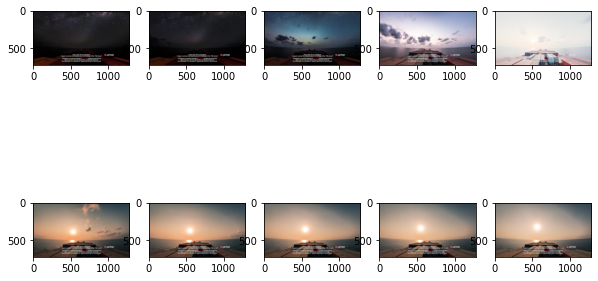

In [0]:
fig = gallery("frames/*", 10, [".jpg"])

In [0]:
test_image = "frames/00010.jpg"

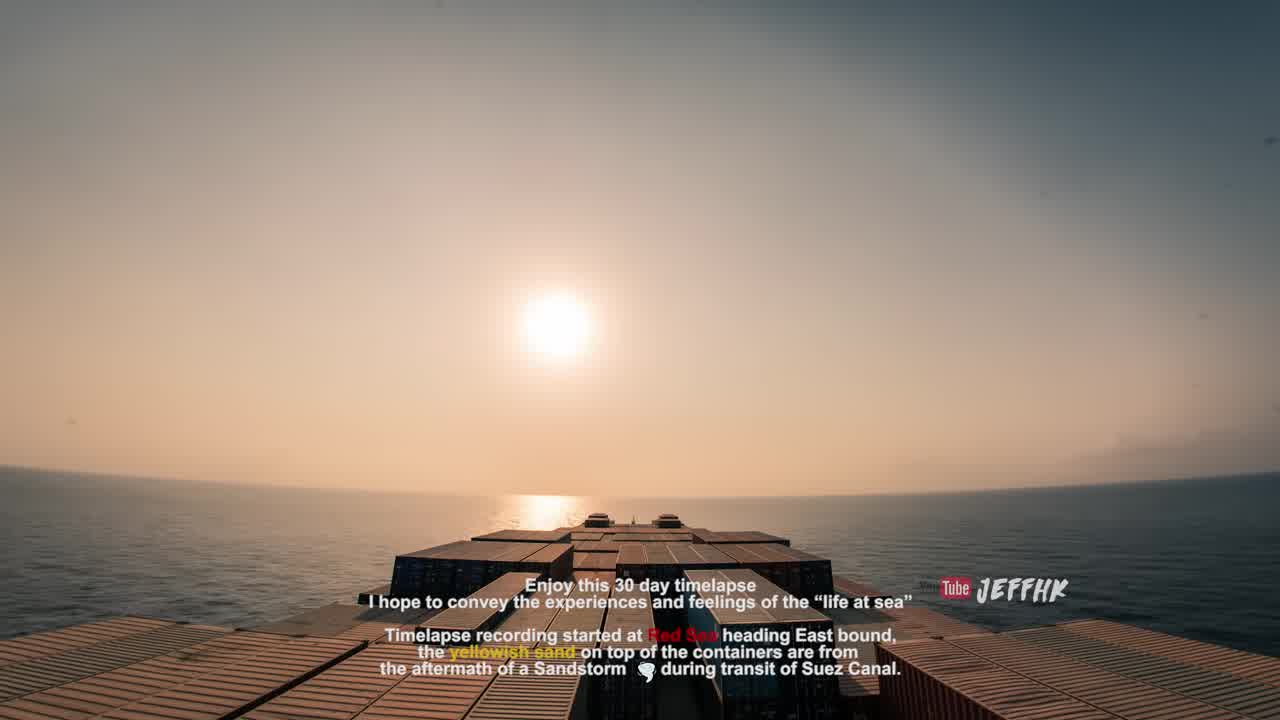

In [0]:
from IPython.display import Image
Image(test_image, width=500)

In [0]:
import numpy as np
import cv2

img = cv2.imread(test_image)
print(img.shape)

(720, 1280, 3)


## 2 Image resizing to 1024x1024

In [0]:
h, w, ch = img.shape
ratio = h/w
print(ratio)
print("we want:", (1024, ratio*1024, 3))

0.5625
we want: (1024, 576.0, 3)


Image resolution (720, 1280, 3) ... so less than 1024 in height but more than 1024 in width.
So what can do?

Downsample to (whatever, 1024,3) and zero-pad with black stripes:

In [0]:
!cp frames/00010.jpg testimg.jpg

img = cv2.imread("testimg.jpg")
print(img.shape)

!ffmpeg -i testimg.jpg -qscale 0 -vf scale=1024:576:force_original_aspect_ratio=decrease,pad=1024:1024:1024:1024:color=black,setsar=1 out.jpg

img = cv2.imread("out.jpg")
print(img.shape)

(720, 1280, 3)
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enabl

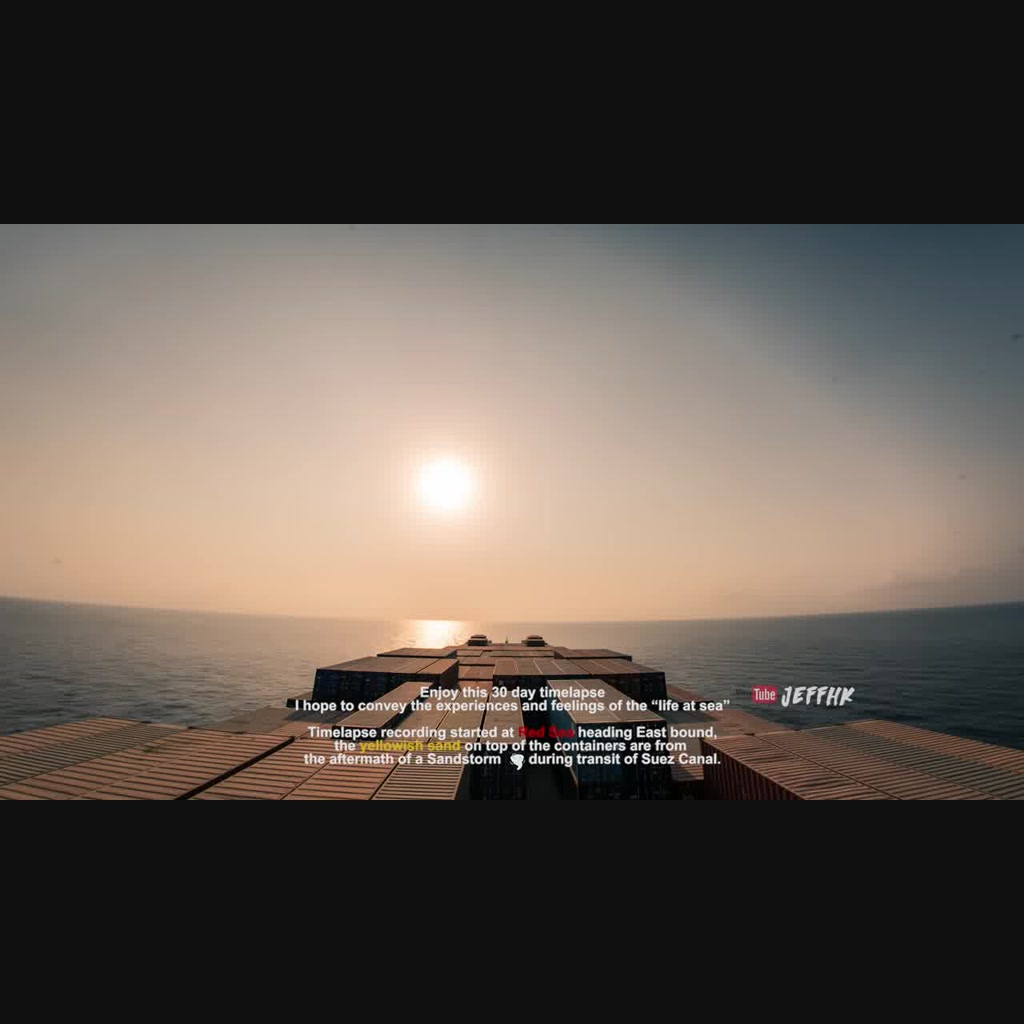

In [0]:
from IPython.display import Image
Image("out.jpg", width=500)

In [0]:
!cp frames frames_res -r

In [0]:
%cd frames_res
!for jpgfile in *.jpg; do ffmpeg -y -i $jpgfile -qscale 0 -vf scale=1024:576:force_original_aspect_ratio=decrease,pad=1024:1024:1024:1024:color=black,setsar=1 $jpgfile; done
%cd ..

# for more commands check https://gist.github.com/previtus/a2c7f62530d1f3921c6dd99dcf752ad3

00001.jpg = (1024, 1024, 3)
00002.jpg = (1024, 1024, 3)
00003.jpg = (1024, 1024, 3)
00004.jpg = (1024, 1024, 3)
00005.jpg = (1024, 1024, 3)


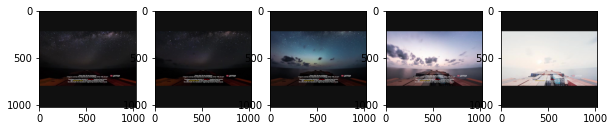

In [0]:
gallery("frames_res/*", 5, [".jpg"])

In [0]:
test_image = "frames_res/00010.jpg"
img = cv2.imread(test_image)
print(img.shape)
# Seems good!

(1024, 1024, 3)


## 3 Final step: save the dataset

In [0]:
!zip -r dataset.zip frames_res

In [0]:
#from google.colab import files
#files.download('dataset.zip') # PS: this will most likely fail! Works with only very small files - not a full dataset

In [0]:
# Better method - save the files into your Google Drive!
# They are both somewhere inside the Google infrastructure, so the saving will be really fast

# (PS: ignore errors here btw)

import google
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()
drive_service = build('drive', 'v3')

def save_file_to_drive(name, path):
    file_metadata = {
      'name': name,
      'mimeType': 'application/octet-stream'
     }

    media = MediaFileUpload(path, 
                    mimetype='application/octet-stream',
                    resumable=True)

    created = drive_service.files().create(body=file_metadata,
                                   media_body=media,
                                   fields='id').execute()

    print('File ID: {}'.format(created.get('id')))

    return created

In [0]:
save_file_to_drive("dataset.zip", "dataset.zip")
# This will save it messily on the root of your Google Drive, search for "dataset.zip" in the main GDrive page.

## (Bonus/Spoiler from the next notebook)

In [0]:
%tensorflow_version 1.x
!git clone https://github.com/tkarras/progressive_growing_of_gans.git
!pip install numpy==1.16
!pip install tqdm
%cd progressive_growing_of_gans

In [0]:
!python dataset_tool.py create_from_images datasets/mytimelapsedataset /content/frames_res/

Loading images from "/content/frames_res/"
Creating dataset "datasets/mytimelapsedataset"



Added 601 images.


In [0]:
# manually edit the config.py file
# use this to check the output:
# desc += '-mytimelapsedataset';            dataset = EasyDict(tfrecord_dir='mytimelapsedataset'); train.mirror_augment = True
!cat config.py | grep mytimelapsedataset
# #desc += '-celebahq';            dataset = EasyDict(tfrecord_dir='celebahq'); train.mirror_augment = True
!cat config.py | grep celebahq

desc += '-mytimelapsedataset';            dataset = EasyDict(tfrecord_dir='mytimelapsedataset'); train.mirror_augment = True
#desc += '-celebahq';            dataset = EasyDict(tfrecord_dir='celebahq'); train.mirror_augment = True


In [0]:
# PS: we don't care about training here at all (this VM didn't even have GPU assigned to it!), 
# but we would like to see the output 
!python train.py

Initializing TensorFlow...




2020-05-27 20:48:12.353481: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Running train.train_progressive_gan()...
Streaming data using dataset.TFRecordDataset...


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_classes(iterator)`.
Dataset shape = [3, 1024, 1024]
Dynamic range = [0, 255]
Label size    = 0
Constructing networks...







Traceback (most recent call

In [0]:
# This looks good:
# ------------------
# Dataset shape = [3, 1024, 1024]
# Dynamic range = [0, 255]
# Label size    = 0